In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from sklearn.model_selection import train_test_split
import natsort

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

In [2]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.exfor.plotting_utilities as exfor_plot
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
importlib.reload(exfor_utils)
importlib.reload(exfor_plot)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
print("Finish importing scripts.")

Finish importing scripts.


# Loading Normalized One-Hot Encoded Training, Validation, and Testing Datasets

In [6]:
df = nuc_data.load_exfor(log=False, num=False, low_en=True)

C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_NaNRaw.csv
Reading data into dataframe...
 MODE: neutrons
 LOW ENERGY: True
 LOG: False
 BASIC: -1


KeyboardInterrupt: 

In [36]:
mt_values_n = df.MT.value_counts().index.values
mt_values_n = np.array(mt_values_n)
mt_values_n = natsort.natsorted(mt_values_n)

In [7]:
df_protons = nuc_data.load_exfor(log=False, num=False, mode="protons", low_en=True)

C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\EXFOR_protons\EXFOR_protons_MF3_AME_no_NaNRaw.csv
Reading data into dataframe...
 MODE: protons
 LOW ENERGY: True
 LOG: False
 BASIC: -1
Data read into dataframe with shape:  (50358, 66)
Finished. Resulting dataset has shape  (50358, 66)


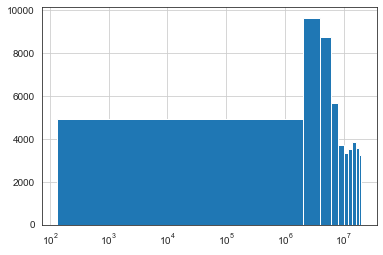

In [8]:
df_protons.Energy.hist()
plt.xscale('log')

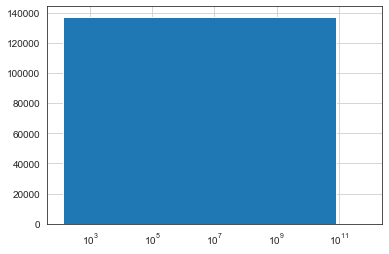

In [5]:
df_protons.Energy.hist()
plt.xscale('log')

In [35]:
mt_values_p = df_protons.MT.value_counts().index.values
mt_values_p = np.array(mt_values_p)
mt_values_p = natsort.natsorted(mt_values_p)

In [ ]:
if MT == 1:
    # (n,tot)
    # Sum of MT=2, 4, 5, 11, 16-18, 22-26, 28-37, 41-42, 44-45, and 102-117.
    df["out_tot"] = 1
if MT == 2: 
    # (n,n)
    df["out_n_el"] = 1
if MT == 3:
    # (n,n')
    # Sum of MT=4, 5, 11, 16-18, 22-26, 28-37, 41-42, 44-45, 102-117
    df["out_n_nonel"] = 1
if MT == 4:
    # (n,n')
    # Sum of MT=50-91.
    df["out_n_nonel"] = 1
if MT == 16:
    # (n,2n)
    df["out_n"] = 2